In [208]:
#importing important functions pre installed in library

#numpy provides working with arrays and other functions
import numpy

#scipy.special is used for the sigmoid function
import scipy.special

#library for plotting arrays
import matplotlib.pyplot
#making sure that plots are inside this notebook
%matplotlib inline

#neuralnetwork class definiton
class neuralNetwork:
    
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        #setting number of nodes in each of input,hidden andoutput layers
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        
        #link weight matrices randomly genrated using random function
        
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        
        #in order to maintain randomisation negatives weights are also considered
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        self.lr=learningrate
        
        self.activation_function=lambda x: scipy.special.expit(x)
        pass
    
    #training the neuralNetwork
    
    def train(self,inputs_list,targets_list):
        
        #convert the input list into 2d arrays
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        targets=numpy.array(targets_list,ndmin=2).T
        
        #now multiplying(dot) the weights with input layers
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        
        hidden_outputs=self.activation_function(hidden_inputs)
        
        
        #calculating signals into final layers
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        final_outputs=self.activation_function(final_inputs)
        
        #errors in final layers
        output_errors=targets-final_outputs
        
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        #now updating the layers/signals using the data of errors
        self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),(hidden_outputs.T))
        
        
        self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),(inputs.T))
        pass
    
    #query the neural network
    
    def query(self,inputs_list):
        
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
    
    
    
#providing values to the layers
input_nodes=784
hidden_nodes=100
output_nodes=10
    
learning_rate=0.3
    
n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
    
    
    
#loading the data from the imported file contains mathematical data about the number/pixels

training_data_file=open("mnist_train_100.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()
    
for record in training_data_list:
   
    all_values=record.split(',')
        
    inputs=(numpy.asfarray(all_values[1:])/255.0 *0.99)+0.01
        
    targets=numpy.zeros(output_nodes)+0.01
        
    targets[int(all_values[0])]=0.99
    n.train(inputs,targets)
    pass
    
                              

In [12]:
import numpy
import matplotlib.pyplot
%matplotlib inline

In [14]:
#extracting and reading the data fromthe imported files
data_file=open("mnist_train_100.csv",'r')
data_list=data_file.readlines()
data_file.close()

In [15]:
len(data_list)

100

In [16]:
data_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

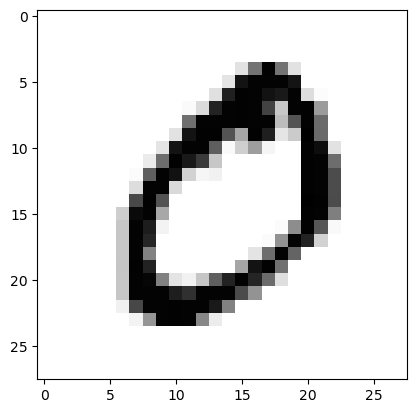

In [17]:
all_values=data_list[1].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [18]:
scaled_input=(numpy.asfarray(all_values[1:])/255.0 *0.99)+0.01
print(scaled_input)


[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [19]:
onodes=10
targets=numpy.zeros(onodes)+0.01
targets[int(all_values[0])]=0.99

In [20]:
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [21]:
import numpy

import scipy.special

In [22]:
class neuralNetwork:
    
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        self.wih=numpy.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        
        self.lr=learningrate
        
        
        self.activation_function=lambda x: scipy.special.expit(x)
        pass
    
    
    def train(self,inputs_list,targets_list):
        
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        final_outputs=self.activation_function(final_inputs)
        
        
        output_errors=target-final_outputs
        
        hidden_errors=numpy.dor(self.who.T,output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

        pass
    def query(self,inputs_list):
        
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        final_outputs = self.activation_function(final_inputs)

        return final_outputs
    
    

        
        

In [23]:
input_nodes=3
hidden_nodes=3
output_nodes=3

learning_rate=0.3

n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

n.query([1.0,0.5,-1.5])

array([[0.34038702],
       [0.52247145],
       [0.39858695]])

In [24]:
import numpy
import scipy.special

import matplotlib.pyplot

%matplotlib inline

In [76]:
class neuralNetwork:
     def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes 
        
        
        self.wih=numpy.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        
        self.lr=learningrate
        
        self.activation_function=lambda x: scipy.special.expit(x)
        
        pass
    
     def train(self,inputs_list,targets_list):
        
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        hidden_inputs=numpy.dot(self.wih,inputs)
        
        hidden_outputs=self.activation_function(hidden_inputs)
        
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        final_outputs=self.activation_function(final_inputs)
        
        output_errors=targets-final_outputs
        
        hidden_errors=numpy.dot(self.who.T,output_errors)
        
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        pass
    
    
     def query(self,inputs_list):
        
        inputs=numpy.array(inputs_list,ndmin=2).T

        hidden_inputs = numpy.dot(self.wih, inputs)

        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)

        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
input_nodes=784
hidden_nodes=200
output_nodes=10

learning_rate=0.1

n=neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)


training_data_file=open("mnist_train_100.csv",'r')
training_data_list=training_data_file.readlines()
training_data_file.close()


epochs=5

for e in range(epochs):
    
    for record in training_data_list:
        
        all_values=record.split(',')
        inputs=(numpy.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=numpy.zeros(output_nodes)+0.01
        
        targets[int(all_values[0])]=0.99
        n.train(inputs,targets)
        pass
    pass
epochs=10


        
        
        

In [73]:
test_data_file=open("test.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()


In [74]:
scorecard=[]

for record in test_data_list:
    
    all_values=record.split(',')
    
    correct_label=int(all_values[0])
    
    inputs=(numpy.asfarray(all_values[1:])/255.0 *0.99)+ 0.01
    
    outputs=n.query(inputs)
    
    label=numpy.argmax(outputs)
    
    if(label==correct_label):
        
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


In [75]:
scorecard_array=numpy.asarray(scorecard)
print("performance=",scorecard_array.sum()/scorecard_array.size)


performance= 0.6


In [82]:
import imageio
import glob


In [83]:
import numpy

import matplotlib.pyplot

%matplotlib inline

In [84]:
our_own_dataset=[]


In [91]:
for image_file_name in glob.glob(r'C:\Users\aksha\2828_my_own_6.png'):
    print("loading....",image_file_name)
    
    label=int(r'C:\Users\aksha\2828_my_own_6.png'[-5:-4])
    
    img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_6.png',as_gray=True)
    
    img_data=255.0-img_array.reshape(784)
    
    img_data=(img_data/255.0*0.99)+0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record=numpy.append(label,img_data)
    print(record)
    
    our_own_dataset.append(record)
    pass


loading.... C:\Users\aksha\2828_my_own_6.png
0.01
1.0
[6.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.15364707 0.06047059 0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.19635296 0.59235299
 0.22741178 0.06435294 0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.

C:\Users\aksha\AppData\Local\Temp\ipykernel_4956\1585259700.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_6.png',as_gray=True)


In [97]:
for image_file_name in glob.glob(r'C:\Users\aksha\2828_my_own_4.png'):
    print("loading....",image_file_name)
    
    label=int(r'C:\Users\aksha\2828_my_own_4.png'[-5:-4])
    
    img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_4.png',as_gray=True)
    
    img_data=255.0-img_array.reshape(784)
    
    img_data=(img_data/255.0*0.99)+0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record=numpy.append(label,img_data)
    print(record)
    
    our_own_dataset.append(record)
    pass


loading.... C:\Users\aksha\2828_my_own_4.png
0.01
0.93011767
[4.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.23905884 0.15364707 0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

C:\Users\aksha\AppData\Local\Temp\ipykernel_4956\1927080511.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_4.png',as_gray=True)


In [98]:
for image_file_name in glob.glob(r'C:\Users\aksha\2828_my_own_3.png'):
    print("loading....",image_file_name)
    
    label=int(r'C:\Users\aksha\2828_my_own_3.png'[-5:-4])
    
    img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_3.png',as_gray=True)
    
    img_data=255.0-img_array.reshape(784)
    
    img_data=(img_data/255.0*0.99)+0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record=numpy.append(label,img_data)
    print(record)
    
    our_own_dataset.append(record)
    pass


loading.... C:\Users\aksha\2828_my_own_3.png
0.01
1.0
[3.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01    

C:\Users\aksha\AppData\Local\Temp\ipykernel_4956\1877331241.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_3.png',as_gray=True)


In [106]:
for image_file_name in glob.glob(r'C:\Users\aksha\2828_my_own_5.png'):
    print("loading....",image_file_name)
    
    label=int(r'C:\Users\aksha\2828_my_own_5.png'[-5:-4])
    
    img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_5.png',as_gray=True)
    
    img_data=255.0-img_array.reshape(784)
    
    img_data=(img_data/255.0*0.99)+0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record=numpy.append(label,img_data)
    print(record)
    
    our_own_dataset.append(record)
    pass


loading.... C:\Users\aksha\2828_my_own_5.png
0.01
0.86800003
[5.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

C:\Users\aksha\AppData\Local\Temp\ipykernel_4956\2259810177.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_5.png',as_gray=True)


In [109]:
for image_file_name in glob.glob(r'C:\Users\aksha\2828_my_own_2.png'):
    print("loading....",image_file_name)
    
    label=int(r'C:\Users\aksha\2828_my_own_2.png'[-5:-4])
    
    img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_2.png',as_gray=True)
    
    img_data=255.0-img_array.reshape(784)
    
    img_data=(img_data/255.0*0.99)+0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record=numpy.append(label,img_data)
    print(record)
    
    our_own_dataset.append(record)
    pass


loading.... C:\Users\aksha\2828_my_own_2.png
0.01
1.0
[2.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01    

C:\Users\aksha\AppData\Local\Temp\ipykernel_4956\1125724714.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_array=imageio.imread(r'C:\Users\aksha\2828_my_own_2.png',as_gray=True)


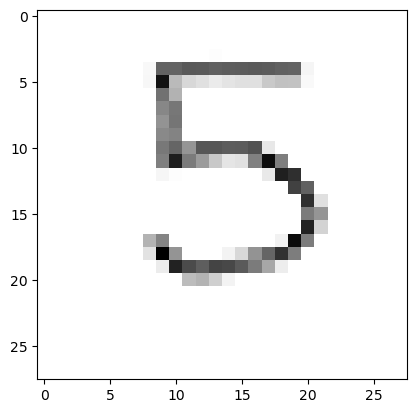

In [110]:
matplotlib.pyplot.imshow(our_own_dataset[3][1:].reshape(28,28),cmap='Greys',interpolation=None)

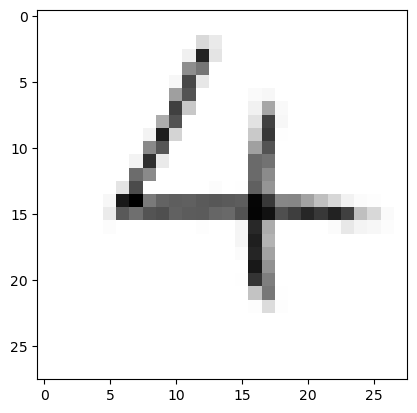

In [116]:
matplotlib.pyplot.imshow(our_own_dataset[1][1:].reshape(28,28),cmap='Greys',interpolation=None)

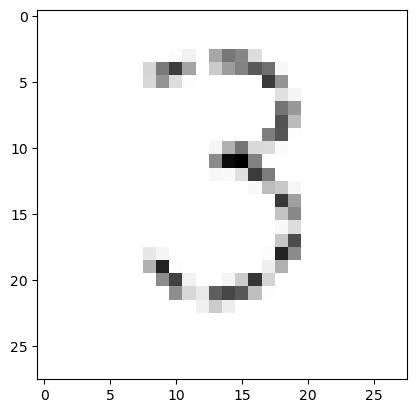

In [117]:
matplotlib.pyplot.imshow(our_own_dataset[2][1:].reshape(28,28),cmap='Greys',interpolation=None)

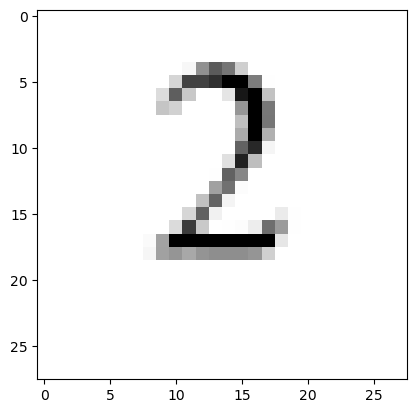

In [119]:
matplotlib.pyplot.imshow(our_own_dataset[5][1:].reshape(28,28),cmap='Greys',interpolation=None)

In [125]:
print(our_own_dataset[0])

[6.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.15364707 0.06047059 0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.19635296 0.59235299
 0.22741178 0.06435294 0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01  

In [126]:
print(our_own_dataset[1])

[4.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.23905884 0.15364707 0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.12258823 0.81752944 0

In [128]:
print(our_own_dataset[5])

[2.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [129]:
print(our_own_dataset[4])

[5.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [130]:
import numpy
import matplotlib.pyplot
%matplotlib inline


In [131]:
import scipy.ndimage

In [133]:
data_file=open("mnist_train_100.csv",'r')
data_list=data_file.readlines()
data_file.close()


In [134]:
record=6

In [135]:
all_values=data_list[record].split(',')
scaled_input=((numpy.asfarray(all_values[1:])/255.0 * 0.99)+0.01).reshape(28,28)


In [136]:
print(numpy.min(scaled_input))
print(numpy.max(scaled_input))


0.01
1.0


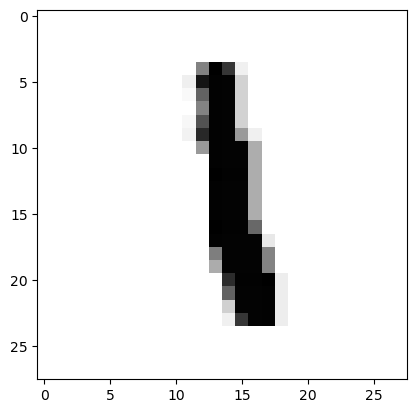

In [137]:
matplotlib.pyplot.imshow(scaled_input,cmap='Greys',interpolation='None')

In [140]:
inputs_plus10_img=scipy.ndimage.rotate(scaled_input,10.0,cval=0.01,order=1,reshape=(28,28))

inputs_minus10_img=scipy.ndimage.rotate(scaled_input,-10.0,cval=0.01,reshape=(28,28))


In [143]:
print(numpy.min(inputs_plus10_img))
print(numpy.max(inputs_plus10_img))

0.009999999999999998
0.9974879535602992


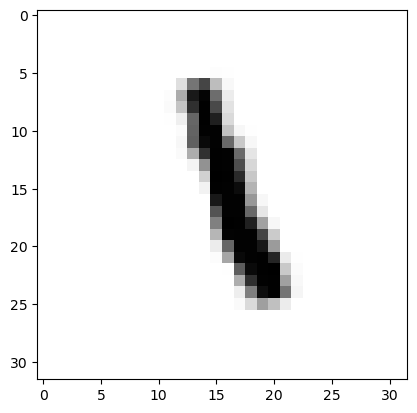

In [145]:
matplotlib.pyplot.imshow(inputs_plus10_img,cmap='Greys',interpolation='None')


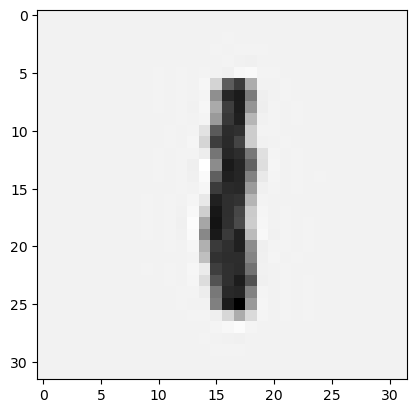

In [146]:
matplotlib.pyplot.imshow(inputs_minus10_img,cmap='Greys',interpolation='None')


In [147]:
import numpy
import scipy.special
import matplotlib.pyplot

%matplotlib inline

In [148]:
import imageio

import glob


In [152]:
class neuralNetwork:
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.onodes=outputnodes
        self.hnodes=hiddennodes
        
        self.wih=numpy.random.normal(0.0,pow(self.inodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.onodes,self.hnodes))
        
        self.lr=learningrate
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    
    def train(self, inputs_list, targets_list):

        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)

        hidden_outputs = self.activation_function(hidden_inputs)
        

        final_inputs = numpy.dot(self.who, hidden_outputs)

        final_outputs = self.activation_function(final_inputs)
        

        output_errors = targets - final_outputs

        hidden_errors = numpy.dot(self.who.T, output_errors) 
        

        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        

        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):

        inputs = numpy.array(inputs_list, ndmin=2).T
        
        hidden_inputs = numpy.dot(self.wih, inputs)

        hidden_outputs = self.activation_function(hidden_inputs)
        
        final_inputs = numpy.dot(self.who, hidden_outputs)

        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

input_nodes = 784
hidden_nodes = 200
output_nodes = 10


learning_rate = 0.1

n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

        
        

In [153]:
epochs=10

for e in range(epochs):
    
    for record in training_data_list:
        
        all_values=record.split(',')
        
        inputs=(numpy.asfarray(all_values[1:])/255.0 *0.99)+0.01
        
        targets=numpy.zeros(output_nodes)+0.01
        
        targets[int(all_values[0])]=0.99
        
        n.train(inputs,targets)
        
        pass
    pass

        

In [183]:
import numpy
import imageio
import glob

our_own_dataset = []

for image_file_name in glob.glob('C:\\Users\\aksha\\2828_my_own_5.png'):
    label = int(image_file_name[-5:-4])
    
    print("loading ...:", 'C:\\Users\\aksha\\2828_my_own_5.png')
    
    img_array = imageio.v3.imread('C:\\Users\\aksha\\2828_my_own_5.png',mode='L')
    
    img_data = 255.0 - img_array.reshape(784)
    
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)
    pass


loading ...: C:\Users\aksha\2828_my_own_5.png
0.01
0.868


In [181]:
import numpy
import imageio
import glob

our_own_dataset = []

for image_file_name in glob.glob('C:\\Users\\aksha\\2828_my_own_4.png'):
    label = int(image_file_name[-5:-4])
    
    print("loading ...:", 'C:\\Users\\aksha\\2828_my_own_4.png')
    
    img_array = imageio.v3.imread('C:\\Users\\aksha\\2828_my_own_4.png',mode='L')
    
    img_data = 255.0 - img_array.reshape(784)
    
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)

    pass


loading ...: C:\Users\aksha\2828_my_own_4.png
0.01
0.9301176470588236


In [180]:
# our_own_dataset=[]

# for image_file_name in glob.glob('C:\\Users\\aksha\\2828_my_own_5.png'):
    
#     label=int(image_file_name[-5:-4])
    
#     print("loading ...:",'C:\\Users\\aksha\\2828_my_own_5.png')
    
#     img_array=imageio.v3.imread('C:\\Users\\aksha\\2828_my_own_5.png',as_gray=True)
    
#     img_data=255.0-img_array.reshape(784)
    
#     img_data=(img_data/255.0*0.99)+0.01
    
#     print(numpy.min(img_data))
#     print(numpy.max(img_data))
    
#     record=numpy.append(label,img_data)
    
#     pass
import numpy
import imageio
import glob

our_own_dataset = []

for image_file_name in glob.glob('C:\\Users\\aksha\\2828_my_own_3.png'):
    label = int(image_file_name[-5:-4])
    
    print("loading ...:", 'C:\\Users\\aksha\\2828_my_own_3.png')
    
    img_array = imageio.v3.imread('C:\\Users\\aksha\\2828_my_own_3.png',mode='L')
    
    img_data = 255.0 - img_array.reshape(784)
    
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)

    pass


loading ...: C:\Users\aksha\2828_my_own_3.png
0.01
1.0


In [178]:
# our_own_dataset=[]

# for image_file_name in glob.glob('C:\\Users\\aksha\\2828_my_own_5.png'):
    
#     label=int(image_file_name[-5:-4])
    
#     print("loading ...:",'C:\\Users\\aksha\\2828_my_own_5.png')
    
#     img_array=imageio.v3.imread('C:\\Users\\aksha\\2828_my_own_5.png',as_gray=True)
    
#     img_data=255.0-img_array.reshape(784)
    
#     img_data=(img_data/255.0*0.99)+0.01
    
#     print(numpy.min(img_data))
#     print(numpy.max(img_data))
    
#     record=numpy.append(label,img_data)
    
#     pass
import numpy
import imageio
import glob

our_own_dataset = []

for image_file_name in glob.glob('C:\\Users\\aksha\\2828_my_own_2.png'):
    label = int(image_file_name[-5:-4])
    
    print("loading ...:", 'C:\\Users\\aksha\\2828_my_own_2.png')
    
    img_array = imageio.v3.imread('C:\\Users\\aksha\\2828_my_own_2.png',mode='L')
    
    img_data = 255.0 - img_array.reshape(784)
    
    img_data = (img_data / 255.0 * 0.99) + 0.01
    
    print(numpy.min(img_data))
    print(numpy.max(img_data))
    
    record = numpy.append(label, img_data)
    our_own_dataset.append(record)
    pass


loading ...: C:\Users\aksha\2828_my_own_2.png
0.01
1.0


[[0.04291531]
 [0.12215765]
 [0.08487869]
 [0.02088794]
 [0.09535478]
 [0.07496571]
 [0.17565483]
 [0.31167459]
 [0.04923587]
 [0.02276891]]
network says 7
no match!


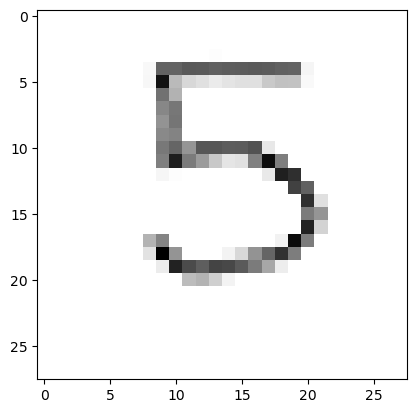

In [185]:
#record to test

item=0

matplotlib.pyplot.imshow(our_own_dataset[item][1:].reshape(28,28),cmap='Greys',interpolation='None')

correct_label=our_own_dataset[item][0]

inputs=our_own_dataset[item][1:]

outputs=n.query(inputs)
print(outputs)

label=numpy.argmax(outputs)
print("network says",label)

if(label==correct_label):
    print("match!")
else:
    print("no match!")
    pass


loading ... my_own_images/2828_my_own_image.png
min =  0.01
max =  1.0
[[0.01415095]
 [0.00612539]
 [0.02852007]
 [0.50680771]
 [0.28592945]
 [0.04245909]
 [0.07636708]
 [0.02504496]
 [0.14862575]
 [0.03887957]]
network says  3


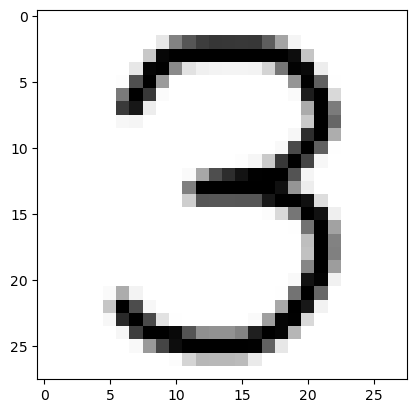

In [202]:
print("loading ... my_own_images/2828_my_own_image.png")
img_array = imageio.v2.imread('C:\\Users\\aksha\\2828_my_own_image.png', as_gray=True)    
# reshape from 28x28 to list of 784 values, invert values
img_data  = 255.0 - img_array.reshape(784)
    
img_data = (img_data / 255.0 * 0.99) + 0.01
print("min = ", numpy.min(img_data))
print("max = ", numpy.max(img_data))

# plot image
matplotlib.pyplot.imshow(img_data.reshape(28,28), cmap='Greys', interpolation='None')

# query the network
outputs = n.query(img_data)
print (outputs)

label = numpy.argmax(outputs)
print("network says ", label)

In [203]:
scorecard_array=numpy.asarray(scorecard)
print("performance=",scorecard_array.sum()/scorecard_array.size)

performance= 0.6


In [209]:
import numpy
# scipy.special for the sigmoid function expit(), and its inverse logit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline



class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
    
    
    
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = numpy.array(targets_list, ndmin=2).T
        
        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = numpy.dot(self.who.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= numpy.min(hidden_outputs)
        hidden_outputs /= numpy.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01
        

        hidden_inputs = self.inverse_activation_function(hidden_outputs)
        
        # calculate the signal out of the input layer
        inputs = numpy.dot(self.wih.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= numpy.min(inputs)
        inputs /= numpy.max(inputs)
        inputs *= 0.98
        inputs += 0.01
        
        return inputs

    
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

scorecard = []

for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)

    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):

        scorecard.append(1)
    else:

        scorecard.append(0)
        pass
    
    pass




label=0

targets=numpy.zeros(output_nodes)+0.01

targets[label]=0.99

print(targets)

#image_data=n.backquery(targets)

#matplotlib.pyplot.imshow(image_data.reshape(28,28),cmap='Greys',interpolation='None')


[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
